In [1]:
import pandas as pd 
import glob 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
path = r'scopusdata' 
all_files = glob.glob(path + "/*.csv")

df=pd.concat((pd.read_csv(f) for f in all_files))
#a bit of minor cleanup. I prefer all my columns to be lowercase 
df.columns = map(str.lower, df.columns)
df.columns
df.dtypes #note that many of these are of datatype 'object'
len(df)
df.head()

Index(['authors', 'author(s) id', 'title', 'year', 'source title', 'volume',
       'issue', 'art. no.', 'page start', 'page end', 'page count', 'cited by',
       'doi', 'link', 'affiliations', 'authors with affiliations', 'abstract',
       'author keywords', 'index keywords', 'funding details',
       'correspondence address', 'publisher', 'pubmed id', 'document type',
       'publication stage', 'access type', 'source', 'eid'],
      dtype='object')

authors                       object
author(s) id                  object
title                         object
year                           int64
source title                  object
volume                        object
issue                         object
art. no.                      object
page start                    object
page end                      object
page count                   float64
cited by                     float64
doi                           object
link                          object
affiliations                  object
authors with affiliations     object
abstract                      object
author keywords               object
index keywords                object
funding details               object
correspondence address        object
publisher                     object
pubmed id                    float64
document type                 object
publication stage             object
access type                   object
source                        object
e

9392

,authors,author(s) id,title,year,source title,volume,issue,art. no.,page start,page end,...,index keywords,funding details,correspondence address,publisher,pubmed id,document type,publication stage,access type,source,eid
0,"Bonomi L., Marchini G., Marraffa M., Bernardi ...",16438564300;7005720033;6701396773;57192481974;...,Vascular risk factors for primary open angle g...,2000,Ophthalmology,107,7,NaN,1287,1293,...,adult; age distribution; aged; article; correl...,NaN,"Bonomi, L.; Clin. Oculistica dell'Univ. Verona...",NaN,10889099.0,Article,Final,NaN,Scopus,2-s2.0-0033761608
1,"Tanure M.A.G., Cohen E.J., Sudesh S., Rapuano ...",6506659416;7403588976;6603349480;7005117622;24...,Spectrum of fungal keratitis at Wills Eye Hosp...,2000,Cornea,19,3,NaN,307,312,...,amphotericin B; fluconazole; itraconazole; ket...,NaN,"Cohen, E.J.; Cornea Service, Wills Eye Hospita...",NaN,10832689.0,Article,Final,NaN,Scopus,2-s2.0-0034126818
2,"Levy R.A., Vilela V.S., Cataldo M.J., Ramos R....",35398389300;6506151613;57196699440;55437940200...,Hydroxychloroquine (HCQ) in lupus pregnancy: D...,2001,Lupus,10,6,NaN,401,404,...,antimalarial agent; DNA antibody; double stran...,NaN,"Levy, R.A.; Hospital Universitario Pedro Ernes...",NaN,11434574.0,Article,Final,NaN,Scopus,2-s2.0-0034990187
3,"Bursell S.-E., Cavallerano J.D., Cavallerano A...",26326720800;6701580100;8906005300;7004750042;6...,Stereo nonmydriatic digital-video color retina...,2001,Ophthalmology,108,3,NaN,572,585,...,adult; aged; article; diabetic retinopathy; di...,NaN,"Aiello, L.M.; Beetham Eye Institute, Joslin Di...",NaN,11237913.0,Article,Final,NaN,Scopus,2-s2.0-0035119376
4,"Nichols J.J., Marsich M.M., Nguyen M., Barr J....",56704320200;6506548363;57212857874;7202043696;...,Overnight orthokeratology,2000,Optometry and Vision Science,77,5,NaN,252,259,...,Contact lenses; Diseases; Error correction; Li...,NaN,"Nichols, J.J.; College of Optometry, Ohio Stat...","Williams & Wilkins Co, Baltimore",10831215.0,Article,Final,NaN,Scopus,2-s2.0-0034035002


In [3]:
#there are some random weird columns we don't really need 
del df["eid"]
del df["publication stage"] #we know from the search that all these are "Final" 
del df["source"] #probably all say "scopus"!
del df["document type"] #these are all "Article" due to search limitations

In [4]:
#check some variables 
df["source title"].value_counts()
df["year"].value_counts()

Optometry and Vision Science                            1083
Ophthalmology                                            370
American Journal of Ophthalmology                        244
Journal of Cataract and Refractive Surgery               190
British Journal of Ophthalmology                         175
                                                        ... 
Journal of Emergency Medicine, Trauma and Acute Care       1
Microvascular Research                                     1
Disease Management and Health Outcomes                     1
Journal of the American Board of Family Medicine           1
Experimental and Clinical Transplantation                  1
Name: source title, Length: 1526, dtype: int64

2019    716
2018    696
2015    624
2016    612
2017    601
2014    590
2013    579
2000    499
2012    471
2005    386
2011    379
2008    364
2003    361
2006    357
2007    345
2009    341
2010    332
2004    328
2002    295
2001    260
2020    256
Name: year, dtype: int64

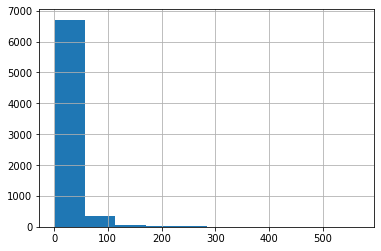

In [5]:
df["cited by"].hist()

In [6]:
df["cited by"].mean()
df["cited by"].quantile([0.25, 0.5, 0.75])
df["cited by"].min() #surprised this isn't zero 
df["cited by"].max()
df["cited by"].std()

18.283629794330185

0.25     3.0
0.50     8.0
0.75    20.0
Name: cited by, dtype: float64

1.0

567.0

33.3453554887943

In [9]:
df.to_csv("dfscopus-1.csv", index=None)